# See if I can make a background map
This is going to test

## Import packages

In [111]:
import laspy
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from mpl_toolkits.mplot3d import Axes3D

## Get general idea of csv data

In [112]:
# Load the CSV file
file_path = './bg_map_csv/00000_arcs.csv'
df = pd.read_csv(file_path)

In [113]:
# Display the first few rows of the dataframe to understand what the data looks like
print(df.head())

   intensity  laser_id  azimuth  distance_m  adjustedtime  timestamp  \
0         36         0       13       4.624     583397946  583397946   
1         43         1       13     101.300     583397946  583397946   
2         16         2       14      53.420     583397948  583397948   
3         14         3       14       7.668     583397948  583397948   
4         13         4       15      10.112     583397950  583397950   

   vertical_angle  Points_m_XYZ:0  Points_m_XYZ:1  Points_m_XYZ:2  
0         -25.000         0.11190          4.1893         -1.9542  
1          -1.000        -7.18900        101.0300         -1.7680  
2          -1.667         1.43500         53.3780         -1.5540  
3         -15.639        -0.16237          7.3823         -2.0671  
4         -11.310         0.26821          9.9120         -1.9831  


In [114]:
# List out all the columns
print("\nColumns in the CSV file:")
print(df.columns.tolist())


Columns in the CSV file:
['intensity', 'laser_id', 'azimuth', 'distance_m', 'adjustedtime', 'timestamp', 'vertical_angle', 'Points_m_XYZ:0', 'Points_m_XYZ:1', 'Points_m_XYZ:2']


In [115]:
# Get basic statistics for all numerical columns
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
          intensity      laser_id       azimuth    distance_m  adjustedtime  \
count  52695.000000  52695.000000  52695.000000  52695.000000  5.269500e+04   
mean      37.060784     14.927204  17795.967397     20.853431  5.834473e+08   
std       33.728470      9.126516  10061.742166     24.638121  2.794897e+04   
min        0.000000      0.000000     13.000000      0.536000  5.833979e+08   
25%       12.000000      7.000000   9214.500000      6.136000  5.834235e+08   
50%       25.000000     15.000000  18071.000000     10.984000  5.834481e+08   
75%       52.000000     23.000000  26333.000000     28.332000  5.834711e+08   
max      225.000000     31.000000  35993.000000    210.570000  5.834979e+08   

          timestamp  vertical_angle  Points_m_XYZ:0  Points_m_XYZ:1  \
count  5.269500e+04    52695.000000    52695.000000    52695.000000   
mean   5.834473e+08       -2.537909        4.129567        6.450021   
std    2.794897e+04        6.827813       18.116989     

In [116]:
# Get the number of unique values for each column
print("\nNumber of unique values in each column:")
unique_counts = df.nunique()
print(unique_counts)


Number of unique values in each column:
intensity           145
laser_id             32
azimuth           23886
distance_m        14302
adjustedtime      28400
timestamp         28400
vertical_angle       32
Points_m_XYZ:0    45997
Points_m_XYZ:1    46599
Points_m_XYZ:2    34294
dtype: int64


In [132]:
# Create a mapping from laser_id to vertical_angle
laser_id_to_elevation = {row['laser_id']: row['vertical_angle'] for index, row in df.iterrows()}

## Get background map csvs

In [117]:
# Define the folder where your CSV files are stored
folder_path = './bg_map_csv/'

# Get a list of all CSV files in the folder
csv_files = glob(os.path.join(folder_path, '*.csv'))

# Process only the first 10 CSV files
csv_files_to_process = csv_files

## Make Dictionary to keep track of each laser vector

In [118]:
# Initialize a dictionary to store laser vector data
laser_vector_dict = {}

# TIME IT

# Process each CSV file
for file in csv_files_to_process:
    # Load the CSV into a DataFrame
    df = pd.read_csv(file)
    
    # Iterate through each row to update the dictionary
    for index, row in df.iterrows():
       # Create a unique identifier for each laser vector: "azimuth_laserID"
        laser_vector = f"{int(row['azimuth'])}_{row['laser_id']}"
        # Create a new entry if the laser vector is not in the dictionary yet
        if laser_vector not in laser_vector_dict:
            laser_vector_dict[laser_vector] = {
                'azimuth': row['azimuth'] / 100,  # Convert here to degrees
                'laser_id': row['laser_id'],
                'distances': []
            }
        # Append the distance to the distances list
        laser_vector_dict[laser_vector]['distances'].append(row['distance_m'])

In [119]:
print(len(laser_vector_dict))

1051653


## Not sure how I want to tackle the rest yet

In [120]:
# Now, for each laser vector in the dictionary, calculate the average distance and store it
for vector in laser_vector_dict.keys():
    distances = laser_vector_dict[vector]['distances']
    if distances:
        laser_vector_dict[vector]['average_distance'] = sum(distances) / len(distances)
    else:
        laser_vector_dict[vector]['average_distance'] = np.nan  # Or some indicator of no data

In [121]:
# Print the first 10 key-value pairs of the average distances
for i, vector in enumerate(laser_vector_dict.items()):
#     print(f"Average distance: {vector[1]['average_distance']}")
    print(vector)
    if i >= 10:
        break

('13_0.0', {'azimuth': 0.13, 'laser_id': 0.0, 'distances': [4.628, 4.628, 4.628, 4.616, 4.632, 4.624, 4.628, 4.628, 4.62, 4.632, 4.624, 4.624, 4.624, 4.624, 4.62, 4.632, 4.62, 4.624, 4.62, 4.624, 4.624, 4.62, 4.624, 4.624, 4.628, 4.62, 4.624, 4.62, 4.62, 4.62, 4.616, 4.628], 'average_distance': 4.6240000000000006})
('13_1.0', {'azimuth': 0.13, 'laser_id': 1.0, 'distances': [101.32, 101.17, 101.3, 101.18, 101.21, 101.18, 101.31, 101.31, 101.31, 101.31, 101.19, 101.19, 101.32, 101.32, 101.2, 101.18, 101.18, 101.32, 101.3, 101.31, 101.3, 101.3, 101.17, 101.19, 101.18, 101.2, 101.19, 101.19, 101.31, 101.19, 101.31, 101.18], 'average_distance': 101.24437499999999})
('14_2.0', {'azimuth': 0.14, 'laser_id': 2.0, 'distances': [53.412, 53.436, 53.412, 53.424, 53.408, 53.42, 53.432, 53.424, 21.152, 53.432, 53.428, 53.42, 53.412, 53.408, 53.408, 53.42, 53.416, 53.42, 53.42, 53.424, 53.42, 22.1, 53.412, 53.428, 53.432, 53.4, 53.424, 53.428, 53.424, 53.408, 53.416, 53.428], 'average_distance': 51.4

In [122]:
def spherical_to_cartesian(r, azimuth, vertical_angle): 
    # Convert angles from degrees to radians
    azimuth_rad = math.radians(azimuth)
    vertical_angle_rad = math.radians(vertical_angle)

    # Spherical to Cartesian conversion
    x = r * math.cos(vertical_angle_rad) * math.sin(azimuth_rad)
    y = r * math.cos(vertical_angle_rad) * math.cos(azimuth_rad)
    z = r * math.sin(vertical_angle_rad)
    
    return x, y, z

In [123]:
# Open a file to write the PCD data
with open('average_points.pcd', 'w') as pcd_file:
    # Write the PCD header
    pcd_file.write('VERSION .7\n')
    pcd_file.write('FIELDS x y z\n')
    pcd_file.write('SIZE 4 4 4\n')
    pcd_file.write('TYPE F F F\n')
    pcd_file.write('COUNT 1 1 1\n')
    pcd_file.write(f'WIDTH {len(laser_vector_dict)}\n')
    pcd_file.write('HEIGHT 1\n')
    pcd_file.write('VIEWPOINT 0 0 0 1 0 0 0\n')
    pcd_file.write(f'POINTS {len(laser_vector_dict)}\n')
    pcd_file.write('DATA ascii\n')
    
    # Write the points data
    for vector, data in laser_vector_dict.items():
        if 'average_distance' in data and not np.isnan(data['average_distance']):
            x, y, z = spherical_to_cartesian(data['average_distance'], data['azimuth'], data['laser_id'])
            pcd_file.write(f'{x} {y} {z}\n')

In [124]:
# Extract Cartesian coordinates from the dictionary
x_coords = []
y_coords = []
z_coords = []

In [125]:
for vector, data in laser_vector_dict.items():
    if 'average_distance' in data and not np.isnan(data['average_distance']):
        
        x, y, z = spherical_to_cartesian(data['average_distance'], data['azimuth'], data['laser_id'])
        x_coords.append(x)
        y_coords.append(y)
        z_coords.append(z)

In [126]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.'''
    
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the 'box size'.
    box_size = max([x_range, y_range, z_range]) / 2.0

    ax.set_xlim3d([x_middle - box_size, x_middle + box_size])
    ax.set_ylim3d([y_middle - box_size, y_middle + box_size])
    ax.set_zlim3d([z_middle - box_size, z_middle + box_size])

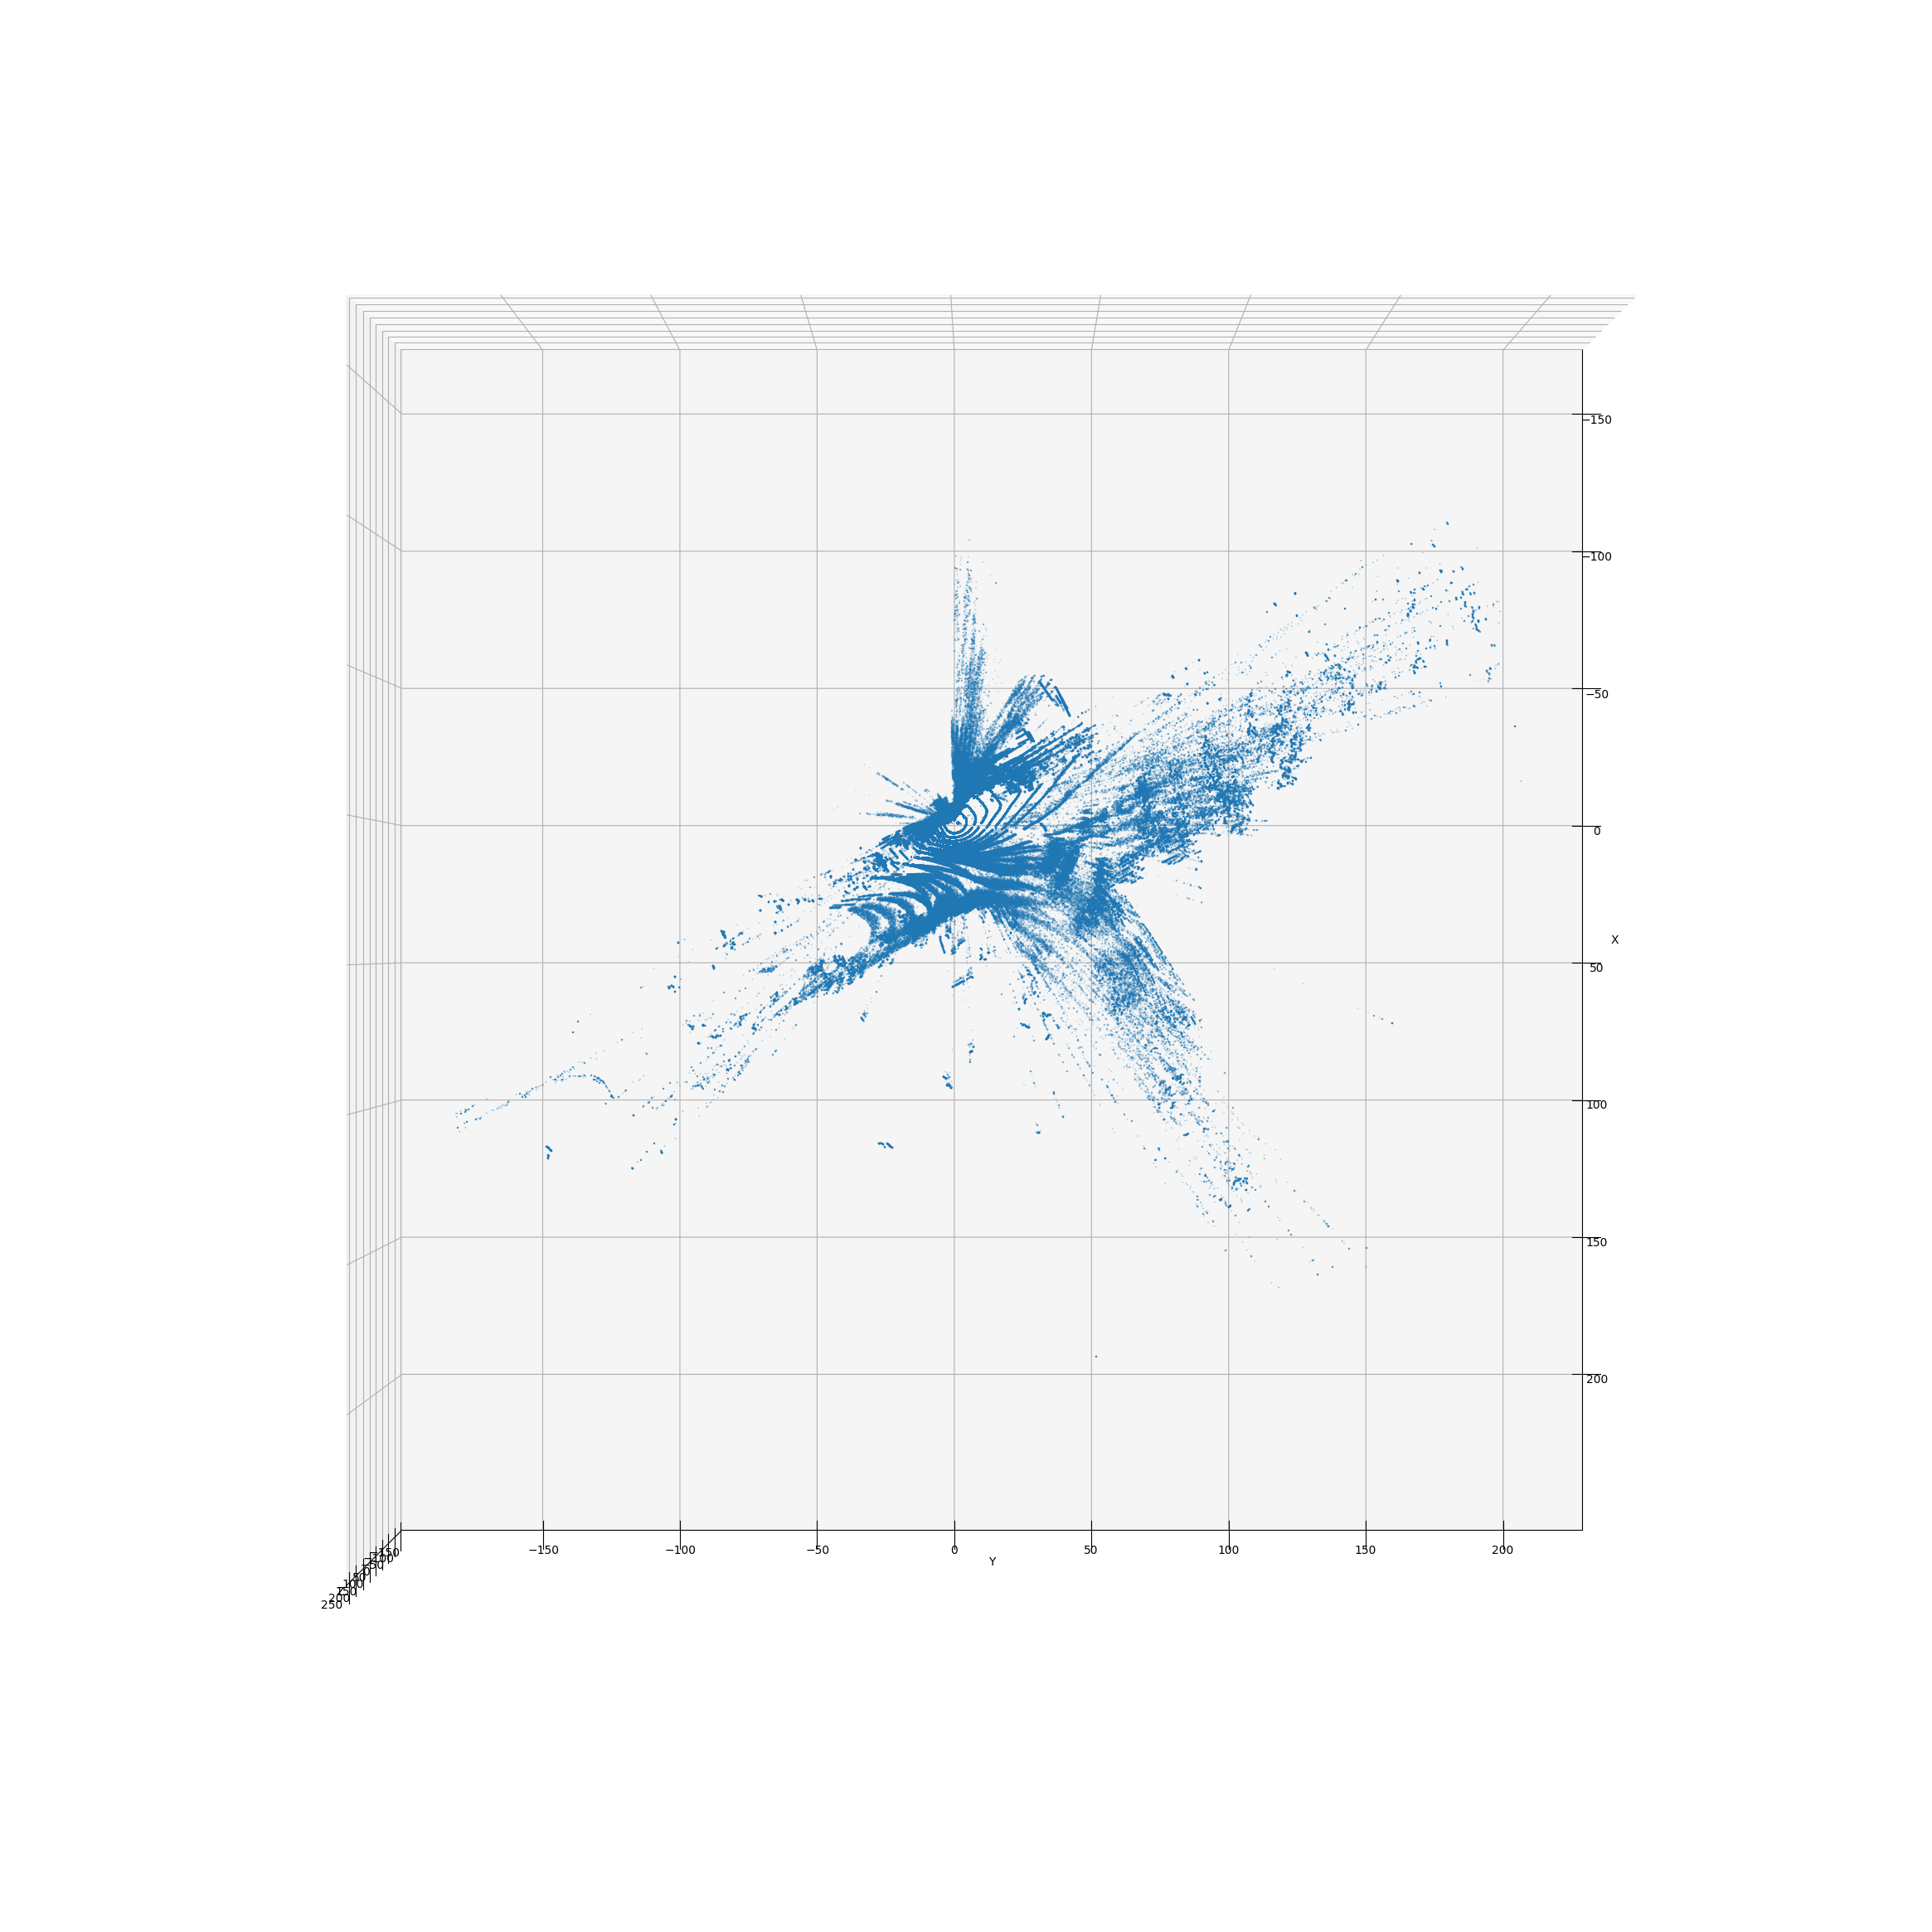

In [131]:
# Set up the figure and 3D axis
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x_coords, y_coords, z_coords, s=0.1, marker=',')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adjust the view angle if needed
ax.view_init(elev=90, azim=0)

# Fix aspect ratio
set_axes_equal(ax)

# Show the plot
plt.show()

# Save the figure
fig.savefig('background_map.png', dpi=300)

## Map ground

In [133]:
# Extract Cartesian coordinates from the dictionary
x_coords_ground = []
y_coords_ground = []
z_coords_ground = []

In [134]:
for vector, data in laser_vector_dict.items():
    # Use the laser_id to get the vertical angle from the mapping
    vertical_angle = laser_id_to_elevation[data['laser_id']]
    
    # Check if the elevation is 0 or less
    if vertical_angle <= 0:
        # Proceed only if 'average_distance' exists and is not NaN
        if 'average_distance' in data and not np.isnan(data['average_distance']):
            # Convert spherical coordinates to Cartesian coordinates
            x, y, z = spherical_to_cartesian(data['average_distance'], data['azimuth'], vertical_angle)
            x_coords_ground.append(x)
            y_coords_ground.append(y)
            z_coords_ground.append(z)

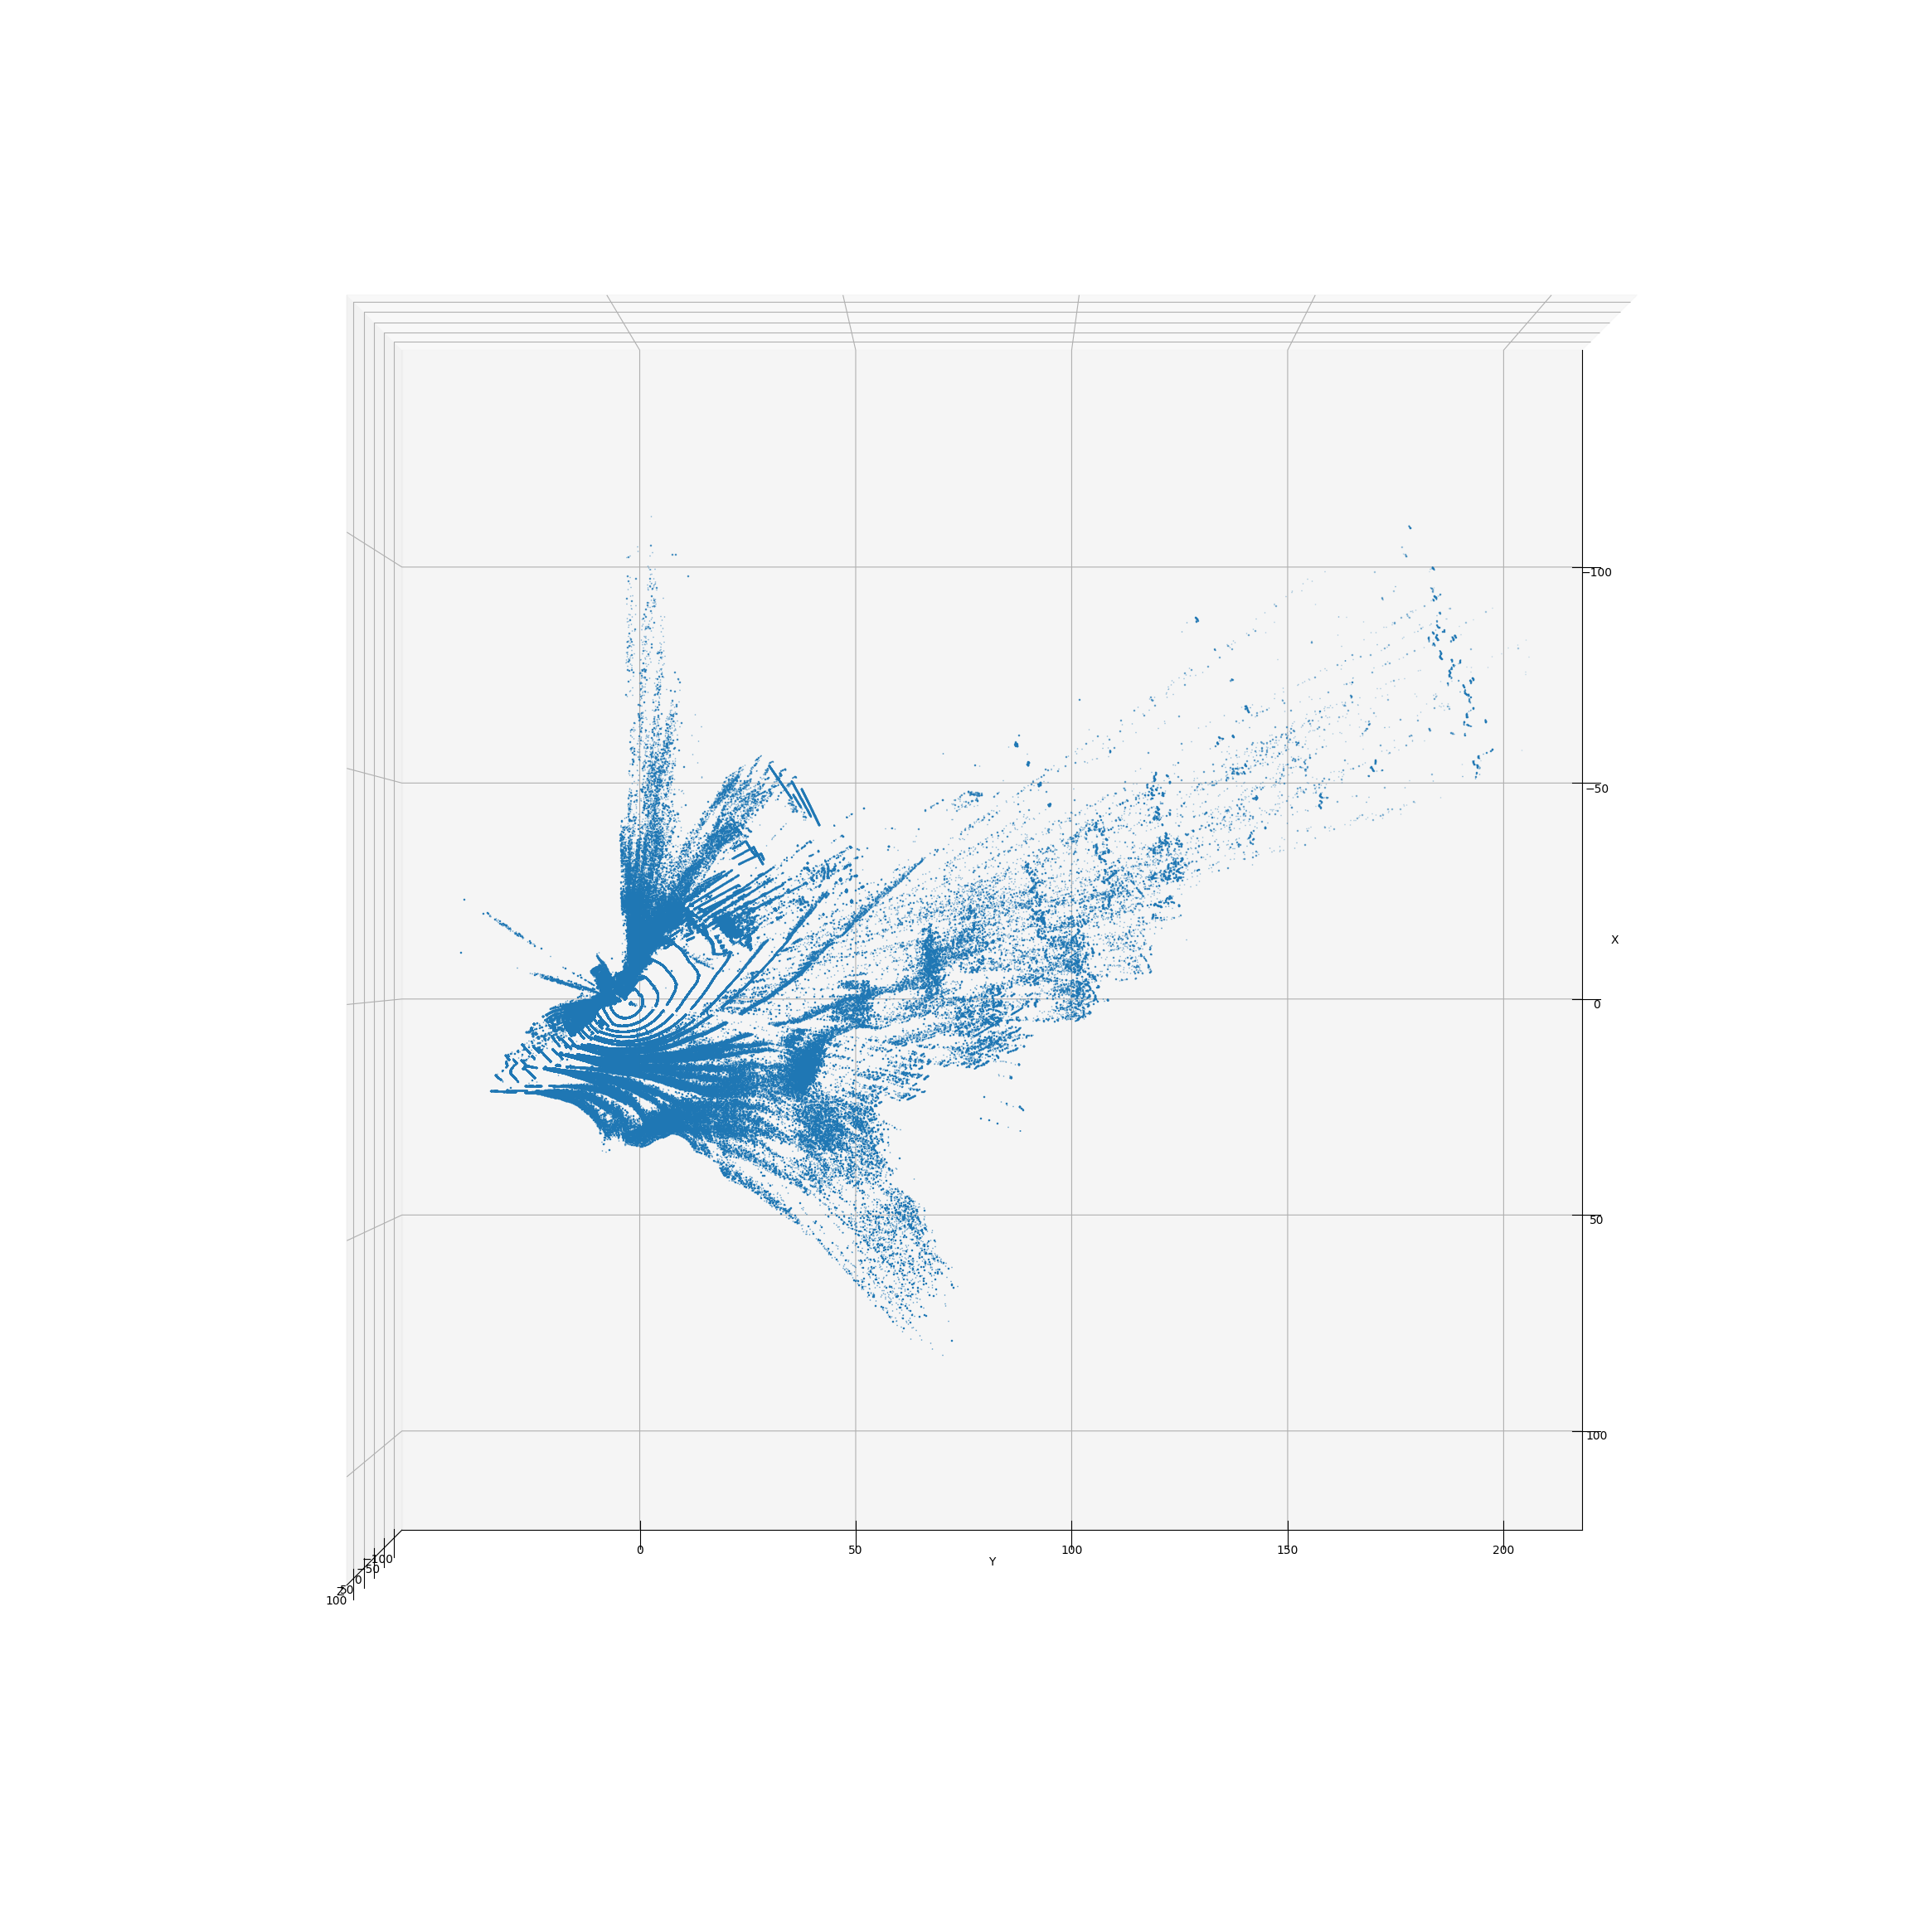

In [135]:
# Set up the figure and 3D axis
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x_coords_ground, y_coords_ground, z_coords_ground, s=0.1, marker=',')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adjust the view angle if needed
ax.view_init(elev=90, azim=0)

# Fix aspect ratio
set_axes_equal(ax)

# Show the plot
plt.show()

# Save the figure
fig.savefig('background_map_ground.png', dpi=300)

## Filter Background

In [182]:
# Load the CSV file
file_path = './bg_test_csv/6000_arcs.csv'
new_frame_df = pd.read_csv(file_path)

In [183]:
# Initialize a list to store the filtered points
filtered_points = []

In [196]:
new_laser_vectors = []
# Go through each point in the new frame and apply the filter
for index, row in new_frame_df.iterrows():
    # Create the unique identifier for this point
    laser_vector = f"{int(row['azimuth'])}_{row['laser_id']}"

    # Get the average distance for this laser vector from the dictionary
    if laser_vector in laser_vector_dict:
        average_distance = laser_vector_dict[laser_vector]['average_distance']

        # If the distance is less than or equal to the average, keep the point
        if row['distance_m'] < (average_distance - 2):
            filtered_points.append(row)
    else:
        new_laser_vectors.append(f"{int(row['azimuth'])}_{row['laser_id']}")

In [197]:
print(len(new_laser_vectors))

52


In [198]:
# Convert the list of filtered points to a DataFrame
filtered_points_df = pd.DataFrame(filtered_points)

In [199]:
print(filtered_points_df.head())

    intensity  laser_id  azimuth  distance_m  adjustedtime     timestamp  \
20       36.0      20.0     11.0      24.588  1.183396e+09  1.183396e+09   
22       27.0      24.0     13.0      26.472  1.183396e+09  1.183396e+09   
47       29.0      24.0     33.0      26.320  1.183396e+09  1.183396e+09   
50        8.0      28.0     35.0      24.732  1.183396e+09  1.183396e+09   
65       28.0      13.0     46.0      81.872  1.183396e+09  1.183396e+09   

    vertical_angle  Points_m_XYZ:0  Points_m_XYZ:1  Points_m_XYZ:2  
20          -3.333         1.84470          24.477        -1.42950  
22          -3.000         0.70584          26.426        -1.38540  
47          -3.000         0.79350          26.272        -1.37750  
50          -2.000         1.96080          24.639        -0.86313  
65           1.333        -1.34280          81.839         1.90460  


In [200]:
# Extract Cartesian coordinates directly from the DataFrame
x_coords_filtered = filtered_points_df['Points_m_XYZ:0'].values
y_coords_filtered = filtered_points_df['Points_m_XYZ:1'].values
z_coords_filtered = filtered_points_df['Points_m_XYZ:2'].values

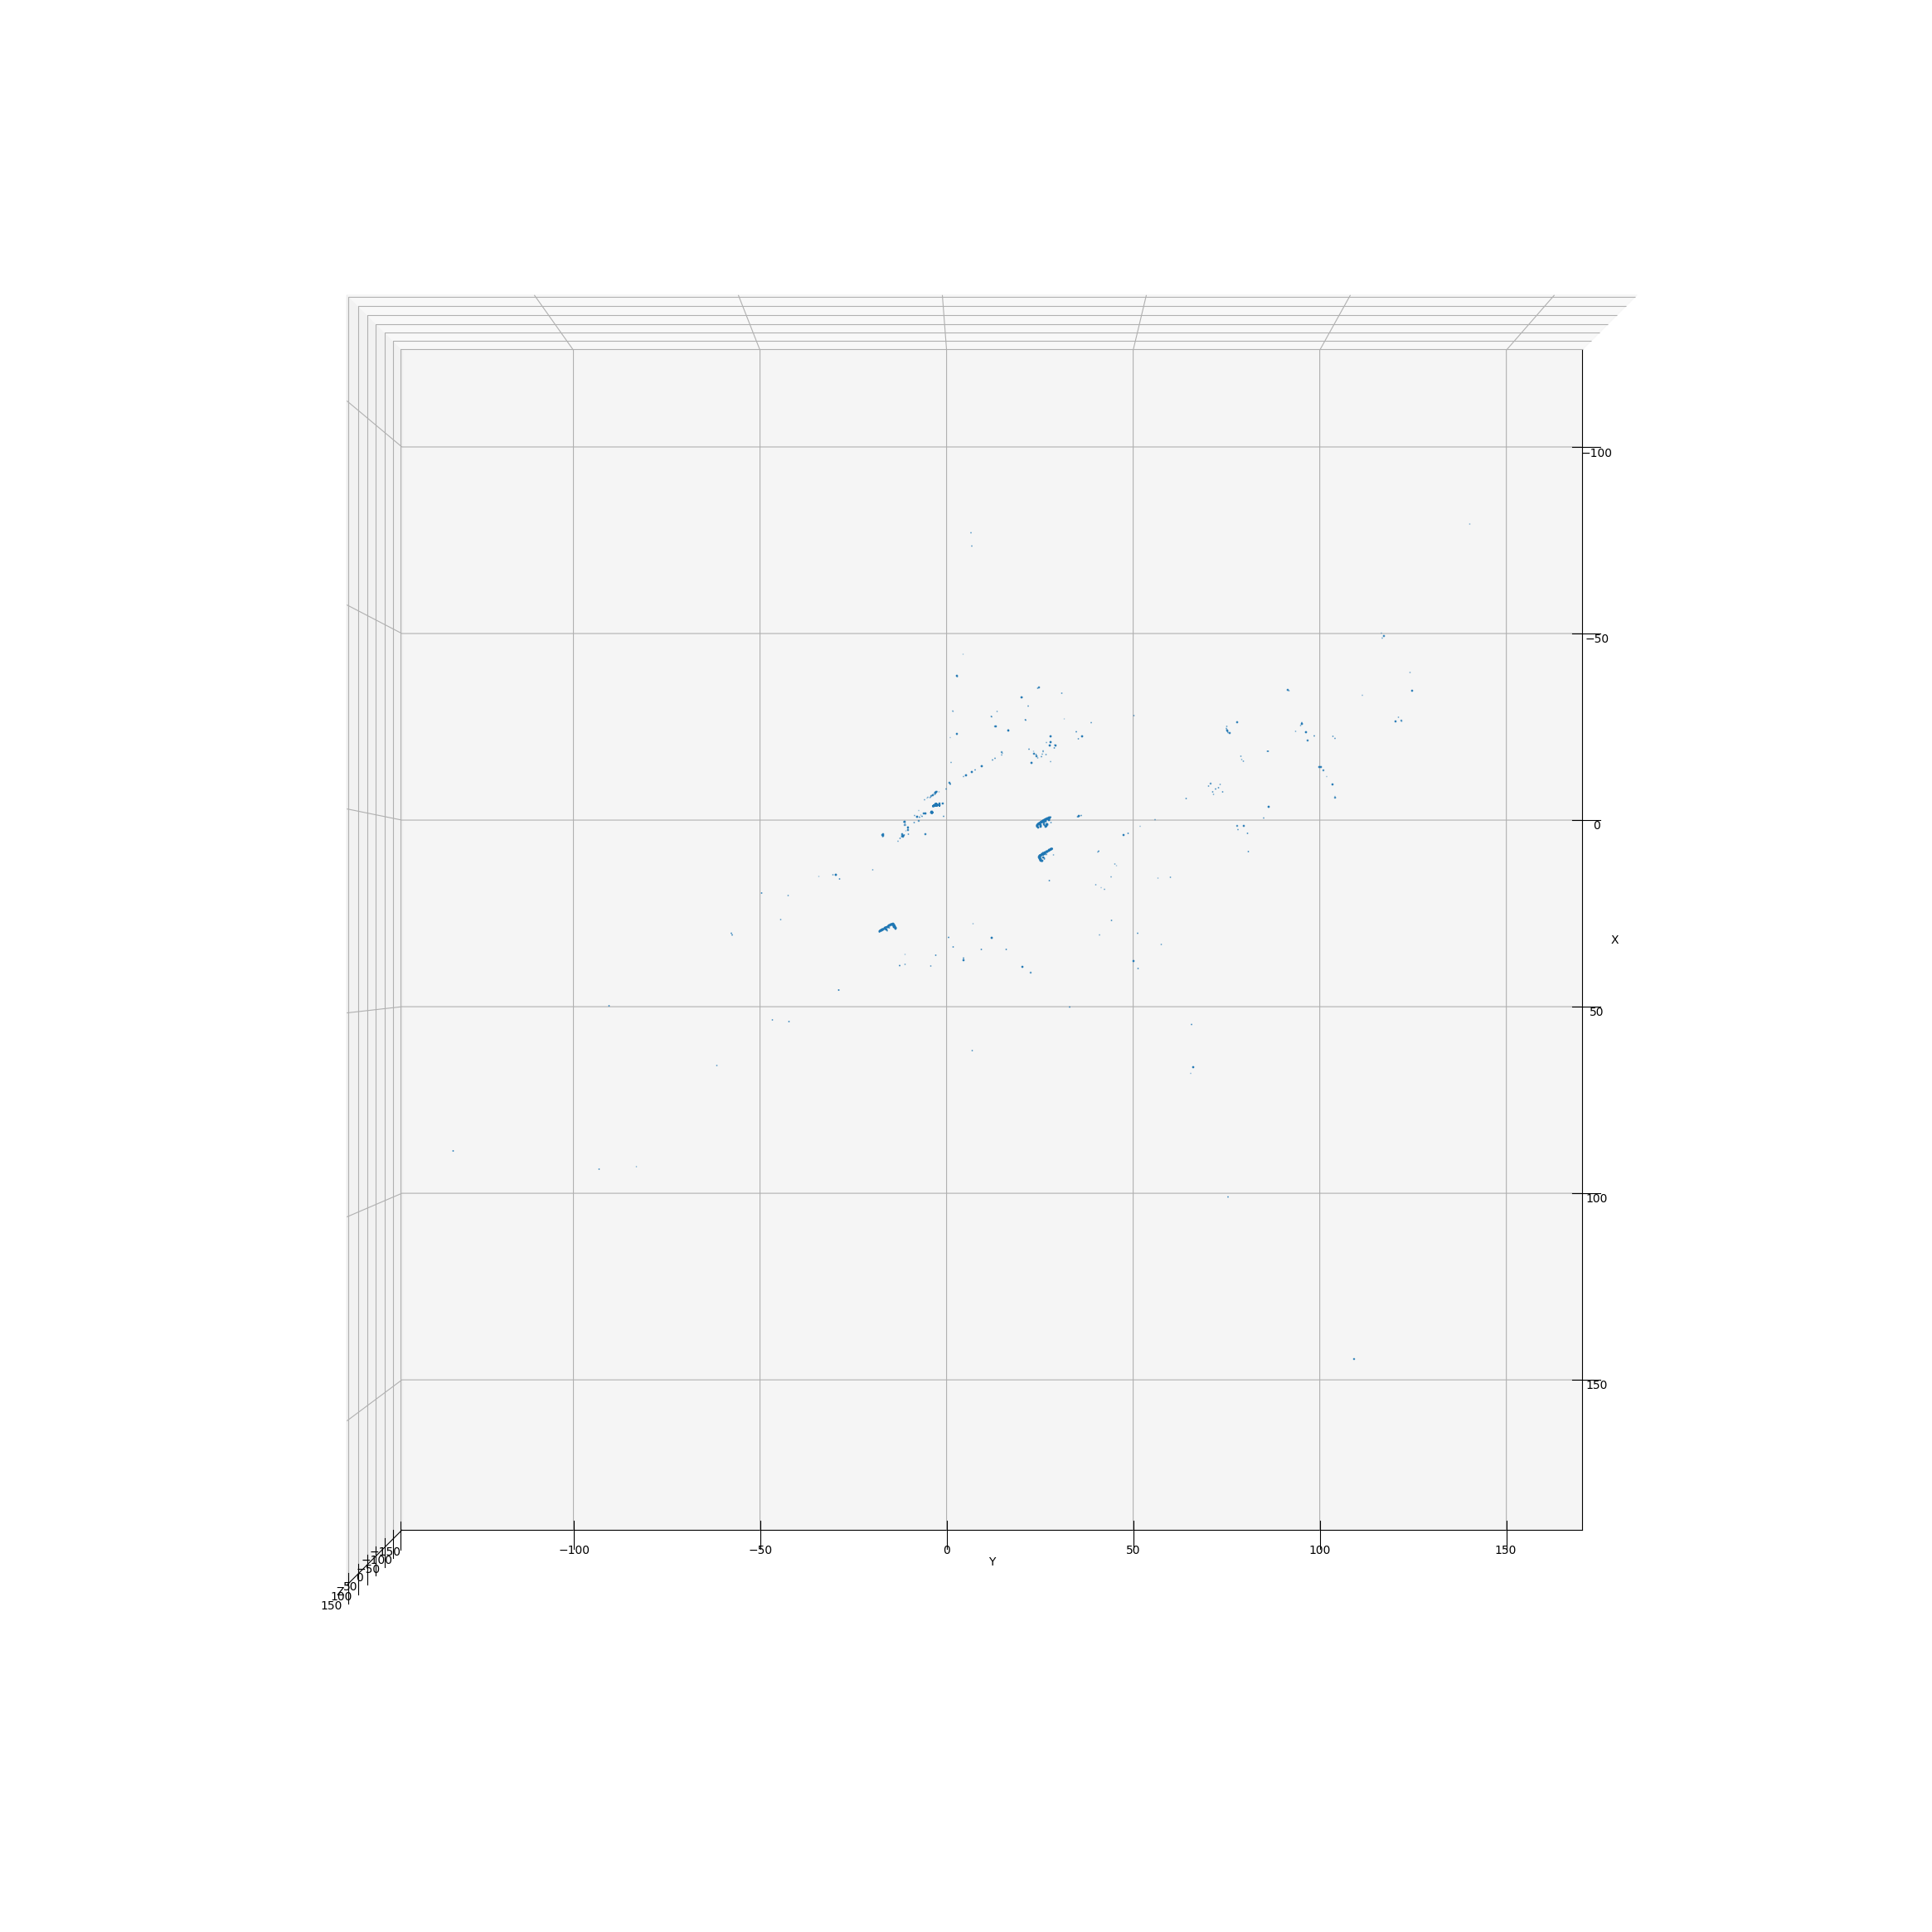

In [201]:
# Set up the figure and 3D axis
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for filtered points
ax.scatter(x_coords_filtered, y_coords_filtered, z_coords_filtered, s=0.1, marker=',')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adjust the view angle if needed
ax.view_init(elev=90, azim=0)

# Fix aspect ratio
set_axes_equal(ax)

# Show the plot
plt.show()

# Save the figure
fig.savefig('filtered_points.png', dpi=300)